The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).



In [35]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

exchange_rates.head()
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

There are 5,699 row and 40 columns
There are null values
Data types for columns consists of Strings and Floats

In [36]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)
exchange_rates['Time']

0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
5694   2021-01-04
5695   2021-01-05
5696   2021-01-06
5697   2021-01-07
5698   2021-01-08
Name: Time, Length: 5699, dtype: datetime64[ns]

In [37]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']]
print(euro_to_dollar['US_dollar'].value_counts())
print(euro_to_dollar['Time'].describe())

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64
count                    5699
unique                   5699
top       1999-01-04 00:00:00
freq                        1
first     1999-01-04 00:00:00
last      2021-01-08 00:00:00
Name: Time, dtype: object


/var/folders/44/qpn0kl1904v7csf4k677jztr0000gn/T/ipykernel_20349/2366554154.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(euro_to_dollar['Time'].describe())


In [38]:
euro_to_dollar = euro_to_dollar.loc[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
print(euro_to_dollar.dtypes)

Time         datetime64[ns]
US_dollar           float64
dtype: object


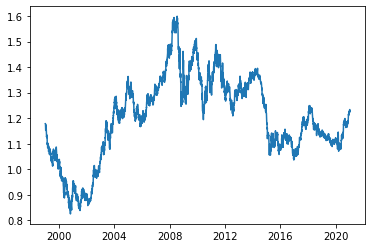

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline 
#Enables Jupyter to display graphs

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

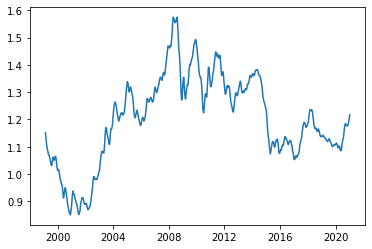

In [40]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

In [41]:
euro_to_dollar['rolling_mean'].describe()

count    5608.000000
mean        1.199748
std         0.161895
min         0.849797
25%         1.101631
50%         1.204373
75%         1.319978
max         1.574333
Name: rolling_mean, dtype: float64

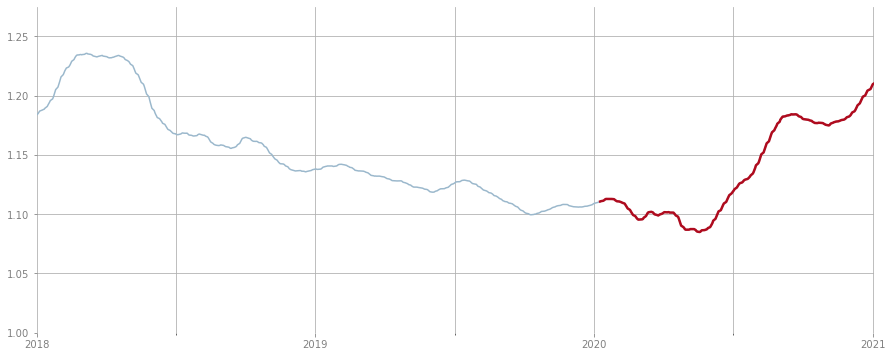

In [42]:
import numpy as np
from matplotlib.ticker import MultipleLocator
from datetime import datetime, timedelta

plt.figure(figsize=(15, 6))
ax = plt.subplot()
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'], color='#9bb8cc',
        )
plt.xlim([np.datetime64('2018-01-01'), np.datetime64('2021-01-01')])
plt.plot(euro_to_dollar['Time'][5380:5694], euro_to_dollar['rolling_mean'][5380:5694],
         color='#af0b1e', linewidth=2.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

major_ticks = np.arange(np.datetime64('2018-01-01'), np.datetime64('2021-01-01'), timedelta(days=365))
minor_ticks = np.arange(np.datetime64('2018-01-01'), np.datetime64('2021-01-01'), timedelta(days=182.5))
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks,minor=True)
ax.set_xticklabels(['2018', '2019','2020','2021'])
ax.grid(which='both')

ax.tick_params(which='major', color='gray')
plt.xticks(color='gray')
plt.yticks(color='gray')
ax.set_ylim(1, 1.275)


# ax.text(x=-80000, y=23.5, s='The Euro-Dollar rate During the Pandemic',
#        size=15, weight='bold')
# ax.text(x=-80000, y=22.5, s='Top 20 countries by death toll (December 2020)',
#        size=12)

plt.show()


In [43]:
euro_to_dollar.loc[euro_to_dollar['Time']=='2019-12-30',:]

,Time,US_dollar,rolling_mean
5435,2019-12-30,1.1189,1.10813


In [44]:
euro_to_dollar['Time'][5380:5694]

5442   2020-01-09
5443   2020-01-10
5444   2020-01-13
5445   2020-01-14
5446   2020-01-15
          ...    
5694   2021-01-04
5695   2021-01-05
5696   2021-01-06
5697   2021-01-07
5698   2021-01-08
Name: Time, Length: 257, dtype: datetime64[ns]

In [45]:
covid_data = pd.read_csv('owid-covid-data.csv')
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207316 entries, 0 to 207315
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    207316 non-null  object 
 1   continent                                   195332 non-null  object 
 2   location                                    207316 non-null  object 
 3   date                                        207316 non-null  object 
 4   total_cases                                 198929 non-null  float64
 5   new_cases                                   198642 non-null  float64
 6   new_cases_smoothed                          197465 non-null  float64
 7   total_deaths                                180147 non-null  float64
 8   new_deaths                                  180102 non-null  float64
 9   new_deaths_smoothed                         178935 non-null  float64
 

In [107]:
covid_data['date'].tail(5)

8970     2022-08-08
96771    2022-08-08
182231   2022-08-08
98984    2022-08-08
207315   2022-08-08
Name: date, dtype: datetime64[ns]

In [47]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data.sort_values('date', inplace=True)

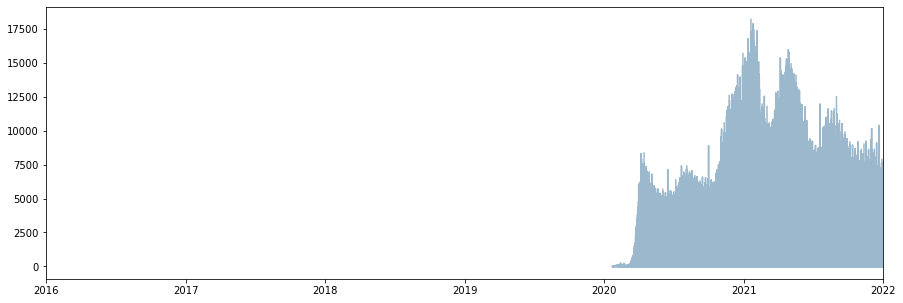

In [66]:
plt.figure(figsize=(15, 5))
plt.plot(covid_data['date'],
         covid_data['new_deaths'], color='#9bb8cc',
        )
plt.xlim([np.datetime64('2016-01-01'), np.datetime64('2022-01-01')])
plt.show()

In [49]:
euro_dollar_prices = pd.read_csv('HistoricalPrices.csv')
euro_dollar_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1716 non-null   object 
 1    Open   1716 non-null   float64
 2    High   1716 non-null   float64
 3    Low    1716 non-null   float64
 4    Close  1716 non-null   float64
dtypes: float64(4), object(1)
memory usage: 67.2+ KB


In [50]:
euro_dollar_prices.columns = euro_dollar_prices.columns.str.replace(' ', '')
euro_dollar_prices['Close'].head(5)

0    1.0195
1    1.0184
2    1.0247
3    1.0167
4    1.0168
Name: Close, dtype: float64

In [51]:
euro_dollar_prices['Rolling'] = euro_dollar_prices['Close'].rolling(30).mean()
euro_dollar_prices['Rolling'].describe()

count    1687.000000
mean        1.139549
std         0.046717
min         1.021763
25%         1.107822
50%         1.132293
75%         1.178035
max         1.235500
Name: Rolling, dtype: float64

In [108]:
euro_dollar_prices['Date'] = pd.to_datetime(euro_dollar_prices['Date'])
euro_dollar_prices.sort_values('Date', inplace=True)
euro_dollar_prices['Date'].head(5)
# euro_dollar_prices['Date'].tail(5)

1715   2016-01-11
1714   2016-01-12
1713   2016-01-13
1712   2016-01-14
1711   2016-01-15
Name: Date, dtype: datetime64[ns]

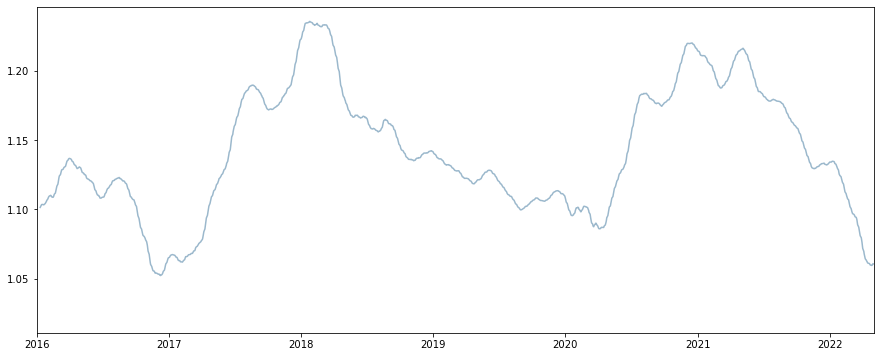

In [111]:
plt.figure(figsize=(15, 6))
plt.plot(euro_dollar_prices['Date'],
         euro_dollar_prices['Rolling'], color='#9bb8cc',
        )
plt.xlim([np.datetime64('2016-01-01'), np.datetime64('2022-05-01')])
plt.show()

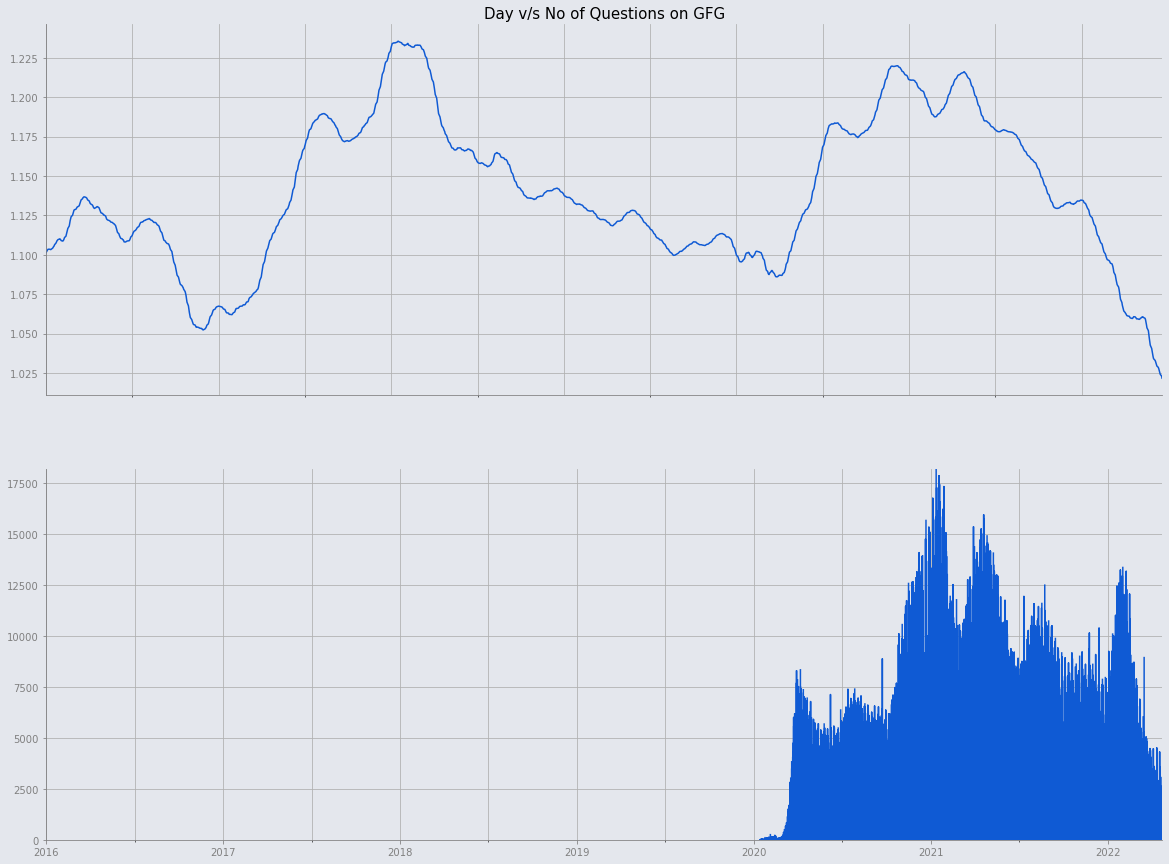

In [155]:
import matplotlib.ticker as plticker

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(20,15),facecolor='#e4e7ed')
ax1.plot(euro_dollar_prices['Date'], euro_dollar_prices['Rolling'], color='#0f5ad4',linewidth=1.5)
ax2.plot(covid_data['date'], covid_data['new_deaths'], color='#0f5ad4')
plt.xlim([np.datetime64('2016-01-11'), np.datetime64('2022-05-01')])

axes = [ax1, ax2]
major_ticks = np.arange(np.datetime64('2016-01-11'), np.datetime64('2022-05-01'), timedelta(days=365))
minor_ticks = np.arange(np.datetime64('2016-01-11'), np.datetime64('2022-05-01'), timedelta(days=182.5))
for ax in axes:
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.tick_params(axis='y', colors='gray')
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks,minor=True)
    ax.grid(which='both')
    ax.set_facecolor('#e4e7ed')
    for location in ['right', 'top']:
        ax.spines[location].set_visible(False)

ax1.spines['bottom'].set_visible(True)
ax1.tick_params(bottom=0)
ax1.set_xticklabels([])
ax2.tick_params(axis='x', colors='gray')
ax2.set_xticklabels(['2016','2017','2018', '2019','2020','2021','2022'])
ax1.margins(x=0)
ax2.margins(y=0)
loc = plticker.MultipleLocator(base=0.025) # this locator puts ticks at regular intervals
ax1.yaxis.set_major_locator(loc)

ax1.set_title('Day v/s No of Questions on GFG', fontsize=15) 

plt.show()